<a href="https://colab.research.google.com/github/abdulkadirdemirci/abdulkadirdemirci/blob/main/medium(eda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
crime = pd.read_csv("/content/drive/MyDrive/veriler/USArrests.csv")

In [10]:
churn.index

RangeIndex(start=0, stop=900, step=1)

In [5]:
churn = pd.read_csv("/content/drive/MyDrive/veriler/churn.csv")

In [27]:
diabets = pd.read_csv("/content/drive/MyDrive/veriler/diabetes.csv")

In [11]:
def general_info(df,head_num=5,tail_num=5):
  print("################### HEAD ########################")
  print(df.head(head_num))
  print("################### TAİL ########################")
  print(df.tail(tail_num))
  print("################### NUMBER OF COLUMNS ########################")
  print(df.shape[0])
  print("################### SHAPE ########################")
  print(df.shape[1])
  print("################### INFO ########################")
  print(df.info());
  print("################### DESCRİBE ########################")
  print(df.describe().T)
  print("################### INDEX ########################")
  print(df.index)
  print("################### COLUMNS ########################")
  print(df.columns)
  print("################### ISNA ########################")
  print(df.isna().values.any())
  print("################### ISNULL SUM. ########################")
  print(df.isnull().sum())
  print("################### uniques ########################")
  for col in df.columns:
    if str(df[col].dtypes) in ["object","category"]:
      print("unique degere sahip col_name : ",col)
      print(df[col].nunique())

In [14]:
pd.set_option("display.width",500)
pd.set_option("display.max_columns",None)

In [ ]:
general_info(churn,5,7)

In [ ]:
dfs = [crime,diabets,churn]

In [ ]:
pd.set_option("display.width",500)
pd.set_option("display.max_columns",None)
for df in dfs:
  general_info(df,5,6)

**CRİME DATAFRAME** :     **TODO LİST**

*    unnamed:0 dan kurtulunacak
*    numeric ve categorık degişkenler listesi oluşturulacak
*    eyaletlerin murder asssault ve rape oranları urbanpop ile bulunacak
*    murder, assault ve rape in eyaletlere göre dagılımları grafıkleştirilecek
*    her bir eyaletin murder assaullt ve rpe grafiği çizilecek


**CHURN DATAFRAME** : **TODO LİST**


*   Unnamed: 0 den kurtulunacak
*   her bir kişinin curn=1 olma oranı gösterilecek

**DIABET DATAFRAME** : **TODO LİST**


*   BMI İNDEXSİNE GÖRE ARALIKLARLA GRUPBY UYGULANACAK
*   doğurganlık mıktarının outcomea karsı % incele
*   heatmap çizilip yuksek korelasyonlular silinecek








***CRİME DATA***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
diabets["class_bmı"] = pd.cut(diabets["BMI"],[0,18.5,25,30,35,60])
diabets.groupby("class_bmı")["Age"].mean()

In [33]:
def grouped(data,whats,w_whats,method="sum"):
  if method == "sum":
    print(data.groupby(whats)[w_whats].sum())
  elif method == "mean":
    print(data.groupby(whats)[w_whats].mean())
  elif method == "std":
    print(data.groupby(whats)[w_whats].std())


In [ ]:
churn.columns
churn.head()

In [ ]:
grouped(churn,"Account_Manager",["Age","Total_Purchase"],"mean")

In [ ]:
churn.groupby("Account_Manager").agg({"Age":"mean",
                                      "Total_Purchase":"sum"})

In [ ]:
pd.pivot_table(churn,"Age","Account_Manager",aggfunc="mean")

In [ ]:
churn.groupby("Account_Manager").agg({"Age":["std","mean"],
                                      "Churn":"mean"})

In [18]:
def low_col_names(df):
  lowered=[]
  for col in df.columns:
    lowered.append(str(col).lower())
  df.columns=lowered


In [71]:
def collect_num_vars(df):
  num_var = [col for col in df.columns if str(df[col].dtypes) in ["int64","float64"] ]
  print(num_var)

def collect_cat_vars(df,th=10):
  cat_var = [col for col in df.columns if (str(df[col].dtypes) in ["object","category","bool"]) | (df[col].nunique() < th) ]
  print(cat_var)


In [101]:
def graph_of_cat(df,col_name,plot=False):
  print(pd.DataFrame({col_name: df[col_name].value_counts(),
              "oran":100*df[col_name].value_counts()/len(df)}))
  print("###########################################")
  if plot:
    sns.countplot(x=df[col_name],data=df)
    plt.title(col_name+" grafiği")
    plt.show(block=True)

In [91]:
diabets["bmı_class"]=pd.cut(diabets["BMI"],[0,18,25,30,40,60])

In [92]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmı_class
0,6,148,72,35,0,33.6,0.627,50,1,"(30, 40]"
1,1,85,66,29,0,26.6,0.351,31,0,"(25, 30]"
2,8,183,64,0,0,23.3,0.672,32,1,"(18, 25]"
3,1,89,66,23,94,28.1,0.167,21,0,"(25, 30]"
4,0,137,40,35,168,43.1,2.288,33,1,"(40, 60]"


   Account_Manager       oran
0              467  51.888889
1              433  48.111111


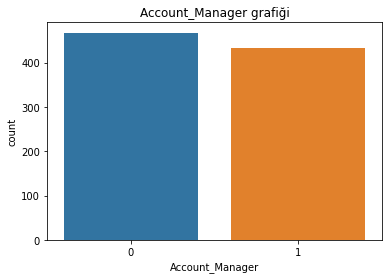

In [69]:
graph_of_cat(churn,"Account_Manager",True)

In [72]:
collect_cat_vars(churn)

['Names', 'Account_Manager', 'Churn']


In [102]:
cat_var=[ col for col in diabets if (str(diabets[col].dtypes) in ["object","bool","category"]) | (diabets[col].nunique() < 10)]


In [ ]:
for col_name in cat_var:
  graph_of_cat(diabets,col_name,plot=True)

In [123]:
crime.index=crime.iloc[:,0]
crime.index.name=None
crime=crime.iloc[:,1:5]

In [126]:
crime.columns=["states","murder","assault","urbanPop","rape"]

In [127]:
crime.head()

,states,murder,assault,urbanPop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
